In [1]:
# Import dataset as downloaded from kaggle
import pandas as pd

import warnings  # ignore all warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("Titanic-Dataset.csv") # Read dataset from local directory

In [2]:
# Check shape
df.shape

(891, 12)

In [3]:
# Check how look dataset
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Knowing the dataset
"""
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	no. of siblings / spouses aboard the Titanic	
parch	no. of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
"""

'\nsurvival\tSurvival\t0 = No, 1 = Yes\npclass\tTicket class\t1 = 1st, 2 = 2nd, 3 = 3rd\nsex\tSex\t\nAge\tAge in years\t\nsibsp\tno. of siblings / spouses aboard the Titanic\t\nparch\tno. of parents / children aboard the Titanic\t\nticket\tTicket number\t\nfare\tPassenger fare\t\ncabin\tCabin number\t\nembarked\tPort of Embarkation\tC = Cherbourg, Q = Queenstown, S = Southampton\n'

In [5]:
# Check Data Type of Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Check missing value
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# check data look mathematically
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Check duplicate values
df.duplicated().sum()

np.int64(0)

In [9]:
# Handle missing values of object values using sklearn SimpleImputer
from sklearn.impute import SimpleImputer
sim_obj = SimpleImputer(strategy='most_frequent')
df[['Cabin','Embarked']] = sim_obj.fit_transform(df[['Cabin','Embarked']])

In [10]:
# Handle missing values of object values using sklearn SimpleImputer
sim_int = SimpleImputer(strategy='mean')
df[['Age']] = sim_int.fit_transform(df[['Age']])
df['Age'] = df['Age'].astype('int64')

In [11]:
# Check missing value
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [12]:
# Save clean data
df.to_csv('new_df.csv')

In [13]:
# import clean data
df = pd.read_csv('new_df.csv')
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,S


Exploratory Data Analysis (EDA)

In [14]:
# checking distribution for target column
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [15]:
# import data vizualization tools
import matplotlib.pyplot as plt
import seaborn as sns

[]

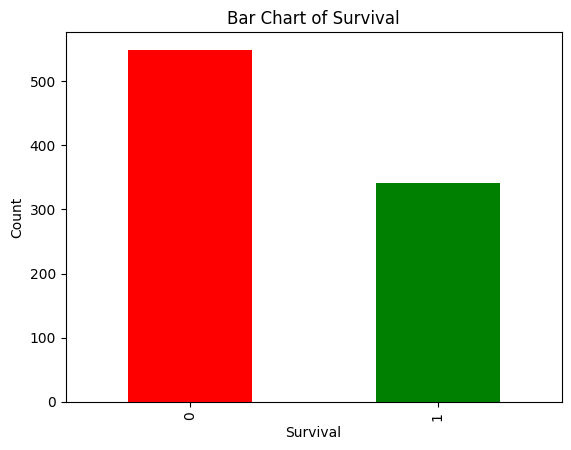

In [16]:
# Bar Chart of Survived in Titanic
df['Survived'].value_counts().plot(kind='bar',color=['red','green'])
plt.title('Bar Chart of Survival')
plt.xlabel('Survival')
plt.ylabel('Count')
plt.plot()

[]

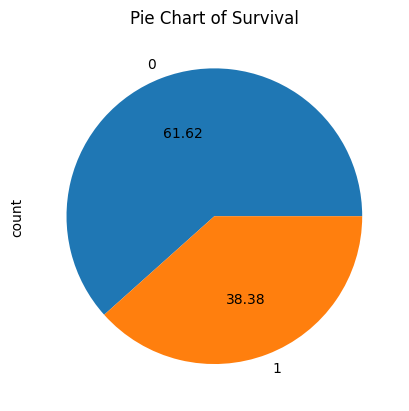

In [17]:
# pie chart of survived in Titanic
df['Survived'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Pie Chart of Survival')
plt.plot()

[]

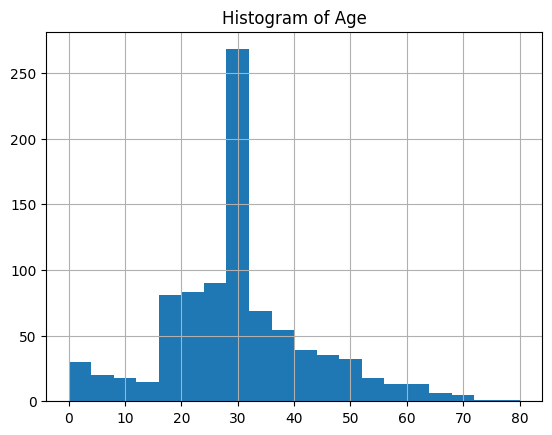

In [18]:
# Histogram of age
df['Age'].hist(bins=20)
plt.title('Histogram of Age')
plt.plot()

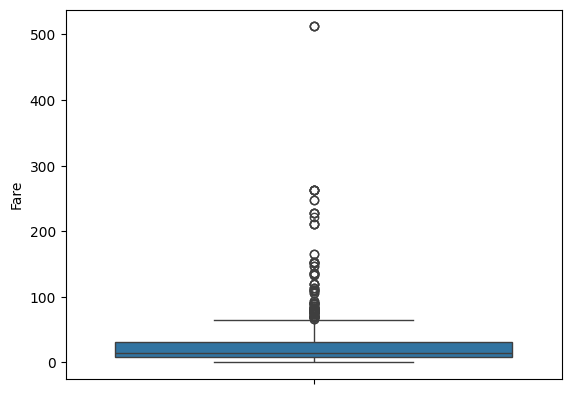

In [19]:
# Boxplot of fare
sns.boxplot(df['Fare'])
plt.show()

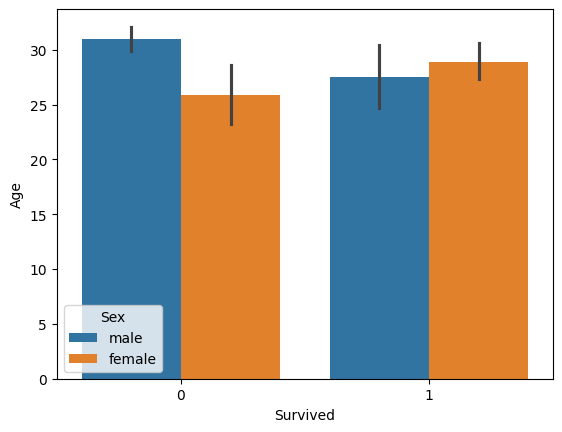

In [20]:
# Bar plot for the comparison of Survived and Age through Sex
sns.barplot(x=df['Survived'],y=df['Age'],hue=df['Sex'])
plt.show()

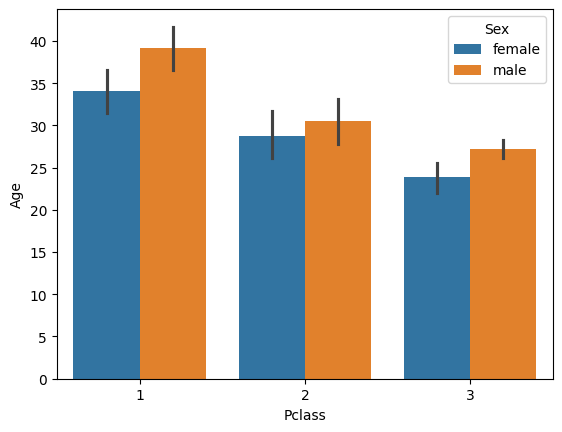

In [21]:
# Bar plot for the comparison of Pclass and Age through Sex
sns.barplot(x=df['Pclass'],y=df['Age'],hue=df['Sex'])
plt.show()

[]

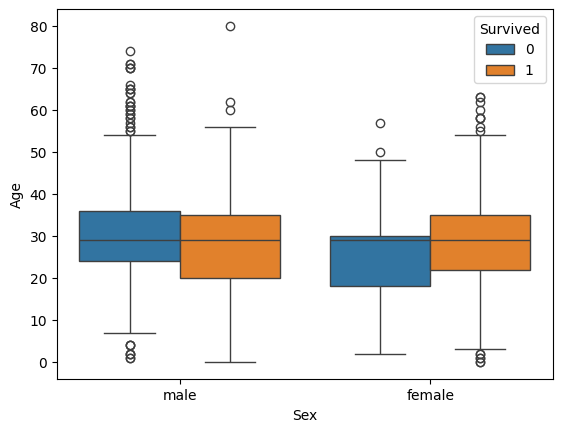

In [22]:
# boxplot of sex and age 
sns.boxplot(x = df['Sex'],y = df['Age'],hue=df['Survived'])
plt.plot()

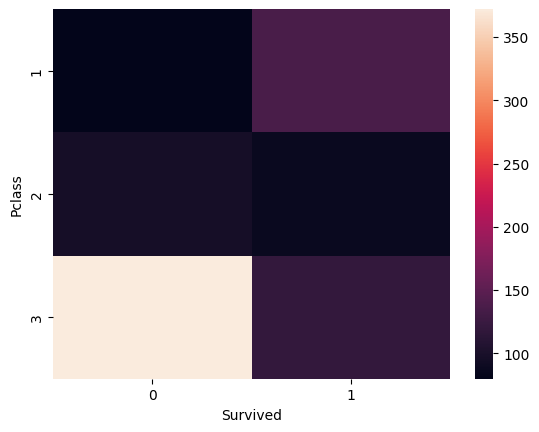

In [23]:
# heatmap of Pclass
sns.heatmap(pd.crosstab(df['Pclass'],df['Survived']))
plt.show()

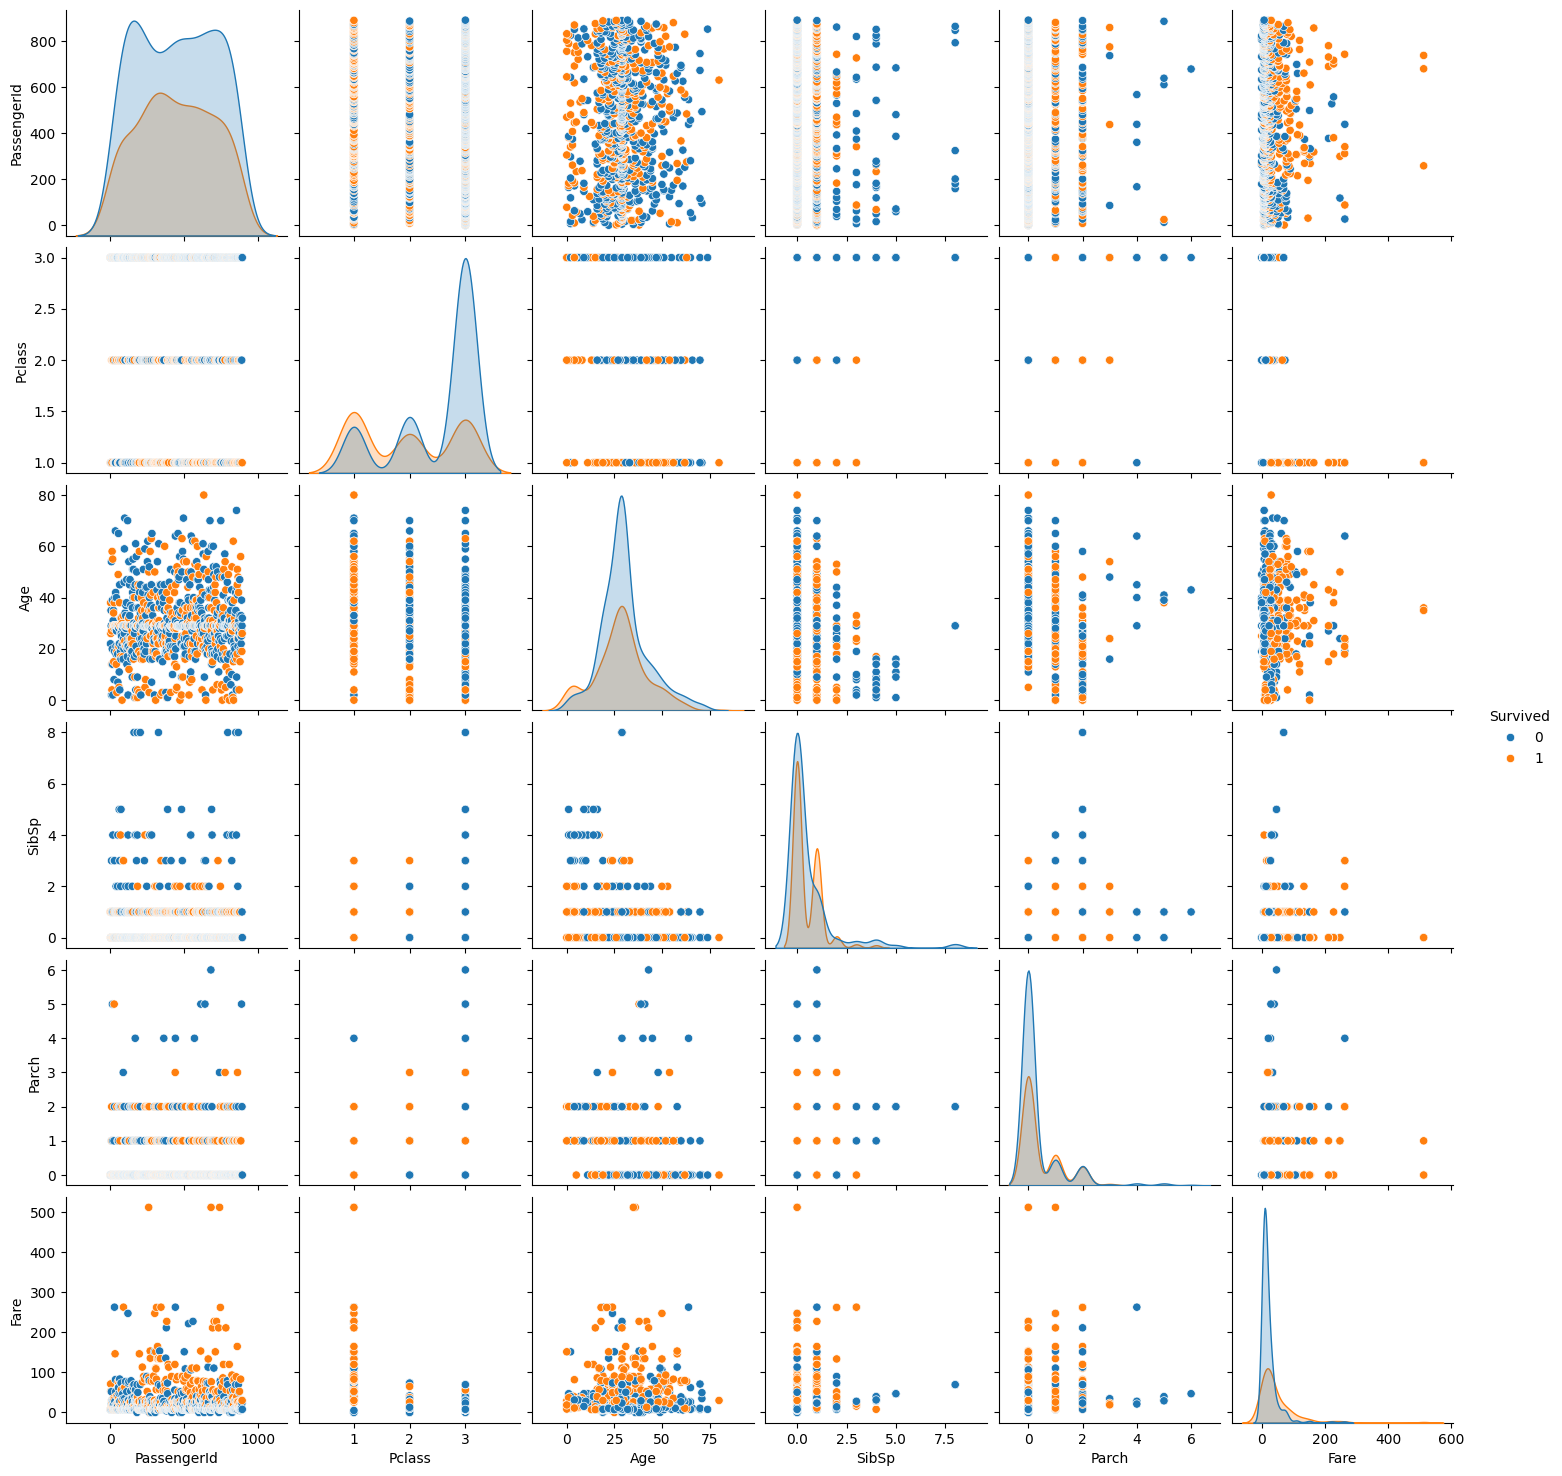

In [24]:
# pair plot of df
sns.pairplot(df,hue='Survived')
plt.show()

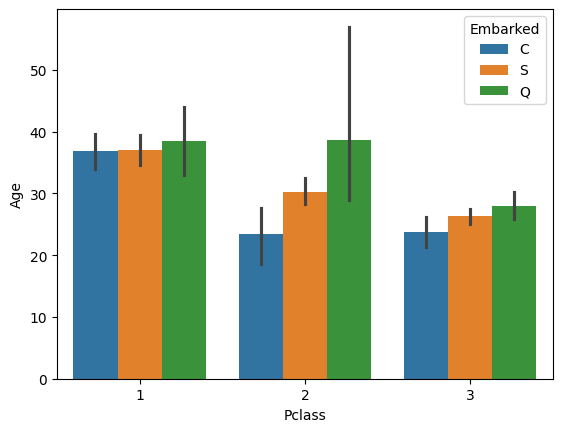

In [25]:
# Bar plot for the comparison of Pclass and Age through Embarked
sns.barplot(x=df['Pclass'],y=df['Age'],hue=df['Embarked'])
plt.show()

Key Columns for Analysis

In [26]:
'''
| Column     | Description                                                          |
| ---------- | -------------------------------------------------------------------- |
| `Survived` | 0 = No, 1 = Yes                                                      |
| `Pclass`   | Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)                             |
| `Sex`      | Gender of passenger                                                  |
| `Age`      | Age in years                                                         |
| `SibSp`    | # of siblings / spouses aboard                                       |
| `Parch`    | # of parents / children aboard                                       |
| `Fare`     | Ticket fare                                                          |
| `Embarked` | Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) |
'''


'\n| Column     | Description                                                          |\n| ---------- | -------------------------------------------------------------------- |\n| `Survived` | 0 = No, 1 = Yes                                                      |\n| `Pclass`   | Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)                             |\n| `Sex`      | Gender of passenger                                                  |\n| `Age`      | Age in years                                                         |\n| `SibSp`    | # of siblings / spouses aboard                                       |\n| `Parch`    | # of parents / children aboard                                       |\n| `Fare`     | Ticket fare                                                          |\n| `Embarked` | Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) |\n'